# [개념 필사]

## CHAPTER 04 <모델 훈련>

## **4.5 규제가 있는 선형 모델**

> 선형 회귀 모델에서의 규제 방법: 모델의 가중치 제한.

## 4.5.1 릿지 회귀 (티호노프 규제):

* 선형회귀 비용함수에 l2 손실을 더하는 규제항 추가

  -- 모델의 가중치를 가능한 한 작게 유지
  -- 훈련동안에만 유효 (훈련 종료 후, 규제가: 없는 성능 지표로 평가)

  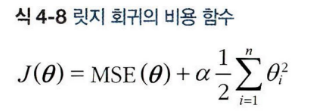

  -- alpha: 모델을 얼마나 많이 규제할지 조절하는 하이퍼파라미터

  -- 경사 하강법 적용 시, MSE그레이디언트벡터에 alpha * w 추가

* 라쏘와 차이점: 파라미터가 전역최적점에 가까워질수록 그레이디언트 감소 (수렴 시 진동 x), alpah 증가시킬수록 최적 파라미터가 원점에 더 가까워짐 (not 0)

```
<사이킷런 릿지 적용 방법>
SGDRegreesor(penalty="l2")
```

## 4.5.2 라쏘 회귀

* 선형회귀 비용함수에 l1 손실을 더하는 규제항 추가
* 덜 중요한 피처의 가중치 제거하려는 방향 (특성 선택, 희소 모델 생성)

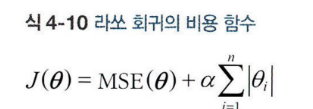
* θi=0 일때 경사하강법 적용방법: 서브그레이디언트 벡터(g) 사용



```
<사이킷런 라쏘 사용 방법>
from sklearn.linear_model import Lasso

SGDRegreesor(penalty="l1")
```

## 4.5.3 엘라스틱넷

* 릿지회귀와 라쏘회귀 절충한 모델: 비용함수에 릿지와 단순 회귀의 규제항 더함. 혼합비율 조절

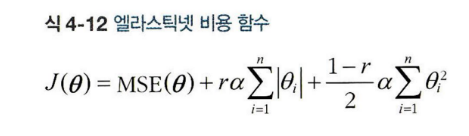

  -- r=0 => 릿지회귀

  -- r=1 => 라쏘회귀

⬜ **회귀 모델 선택 정리**

> 선형 회귀보다 규제가 있는 모델이 일반적으로 낫고, 릿지가 기본 선택.

▶ 특성이 몇 개뿐이라면 라쏘, 엘라스틱넷 적합

▶ 특성이 많거나 강하게 연관된 경우엔 라쏘보다 엘라스틱넷이 유리


## 4.5.4 조기 종료

* 검증 에러가 최솟값에 도달하면 즉시 훈련을 중지시키는 규제 방법
* SGD, 미니배치 GD 에서는 곡선이 매끄럽지 않아 최솟값 도달 확인이 어려울 수 있음 => 검증에러가 일정시간 동안 최솟값보다 클 때 학습 중지 => 최솟값일때의 모델 파라미터 선택


## **4.6 로지스틱 회귀**

> 샘플이 특정 클래스에 속할 확률 추정에 많이 사용 (이진 분류)

## 4.6.1 확률 추정

* 피처 가중치 합 계산, 편향 더하기 (=선형회귀) => 결괏값의 로지스틱 출력

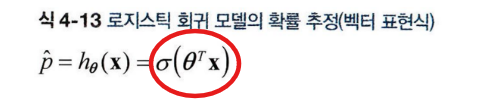

* 로지스틱 함수: 0과 1 사이의 값을 출력하는 시그모이드 함수

## 4.6.2 훈련과 비용 함수

* 훈련 방법: 양성샘플에 대해서는 높은 확률 추정 & 음성 샘플에 대해서는 낮은 확률 추정 하는 모델 파라미터 찾기.

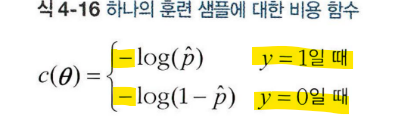

* 전체 훈련 세트 비용 함수 = 모든 훈련 샘플의 비용 평균 = 로그손실

  -- 경사하강법으로 전역 최솟값 구할 수 있음

## 4.6.3 결정 경계

* 양쪽 확률이 똑같이 50%가 되는 값에서 결정 경계 형성
* l1, l2 규제 가능

## 4.6.4 소프트맥스 회귀 (다항 로지스틱 회귀)

* 로지스틱 회귀가 직접 다중 클래스 지원하도록 일반화된 모델
* 각 클래스에 대한 점수 계산 => 점수에 소프트맥스 함수(정규화된 지수 함수) 적용하여 각 클래스의 확률 추정
* 각 클래스만의 파라미터 벡터들은 파라미터 행렬에 저장
* 한 번에 하나의 클래스만 예측 (다중 출력X)
* 훈련 방법: 타깃 클래스에 대해서 높은 확률을 추정하는 파라미터 찾기. = 크로스 엔트로피 비용 함수 최소화
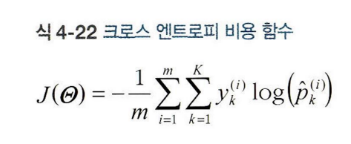

* 그레이디언트 벡터 계산 가능 = 경사 하강법 사용 가능



```
<소프트맥스 회귀 적용 방법>
LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)

solver - 소프트맥스 회귀 지원 알고리즘

C - l2 규제 적용을 조절하는 하이퍼 파라미터
```




# [코드 필사]

In [1]:
import numpy as np
m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5 * X **2 + X + 2 + np.random.randn(m,1)

In [2]:
## 1. 사이킷런, 정규방정식을 사용한 릿지 회귀 적용

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([5.04041843])

In [3]:
## 2. SGD 적용
from sklearn.linear_model import SGDRegressor
sgd_leg = SGDRegressor(penalty="l2")
sgd_leg.fit(X, y.ravel())
sgd_leg.predict([[1.5]])

array([5.02634726])

In [4]:
## 사이킷런 라쏘

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.99357492])

In [5]:
## 사이킷런 엘라스틱

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) ## l1_ratio : 혼합비율 r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.99359575])

In [15]:
## 기본적인 조기종료 구현 코드

from sklearn.base import clone
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

# 데이터 준비
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_leg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005) # warm_stat=True : fit() 호출 시, 이전 모델 파라미터에서 훈련 이어감
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_leg.fit(X_train_poly_scaled, y_train.ravel()) # 훈련 이어서 진행
    y_val_predict = sgd_leg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_leg)

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [8]:
X = iris['data'][:,3:] # 꽃잎 너비
y = (iris['target']==2).astype(int) #Iris-Virginica 는 1, 아니면 0

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

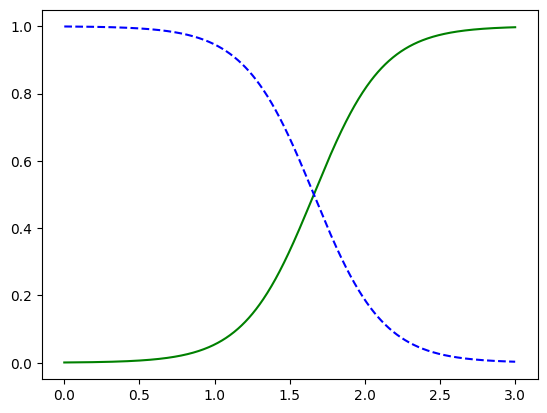

In [10]:
import matplotlib.pyplot as plt

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris-Virginica")

* 양쪽 확률이 똑같아지는 1.6cm 근방에서 결정 경계가 만들어짐

In [11]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [12]:
## 소프트맥스회귀, 붓꽃 데이터 3개 클래스로 분류

X = iris["data"][:, (2,3)] # 꽃잎 길이, 꽃잎 너비
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [13]:
softmax_reg.predict([[5,2]])

array([2])

In [14]:
softmax_reg.predict_proba([[5,2]])

array([[6.21626374e-07, 5.73689802e-02, 9.42630398e-01]])